In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('/Users/edwardmattern/Documents/power_model.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [3]:
X = df[['PRCP','AWND','TMAX','TMIN','NG1_PRICE','CO2_PRICE','LMP_N']]  # Independent variables
y = df['LMP_H']

In [4]:
X = sm.add_constant(X)

In [5]:
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LMP_H   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.557e+05
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:43:28   Log-Likelihood:                -2808.8
No. Observations:                 839   AIC:                             5634.
Df Residuals:                     831   BIC:                             5671.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5662      2.151     -6.773      0.0

In [6]:
start_date = '2021-01-04'
end_date = '2022-01-04'
df2 = df.loc[start_date:end_date]

In [7]:
df2

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,H_N_POWER_FLOW,H_S_POWER_FLOW,...,AWND,PRCP,WT_FOG,WT_HFOG,WT_THNDR,WT_ICE,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-04,3.812,91.7028,76.74,180.000,26.46,26.56,26.49,11.23,125,125,...,5.59,0.00,0,0,0,0,0,0,0,45107.11920
2022-01-03,3.882,90.7308,75.85,174.000,36.92,37.47,37.42,34.20,125,123,...,3.80,0.00,0,0,0,0,0,0,0,41465.61760
2021-12-31,3.717,87.1020,74.88,157.500,28.26,27.60,26.61,28.32,110,109,...,8.50,0.00,1,0,0,0,0,0,1,45283.33435
2021-12-30,3.815,86.5728,76.61,169.600,27.47,27.12,27.90,26.81,104,102,...,4.47,0.00,1,0,0,0,0,0,1,49018.88803
2021-12-29,3.730,86.7888,76.18,170.100,30.13,27.78,30.16,22.61,95,95,...,4.92,0.00,1,0,0,0,0,0,1,40323.35772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2.666,36.3420,52.24,86.285,24.37,24.62,25.52,25.20,125,124,...,7.16,0.00,0,0,0,0,0,0,0,42437.07003
2021-01-07,2.727,37.4328,50.83,86.285,20.55,20.50,21.19,20.96,127,126,...,10.74,0.00,0,0,0,0,0,0,0,45691.55259
2021-01-06,2.753,37.2924,50.63,86.286,16.51,16.97,15.75,12.71,110,112,...,11.63,1.04,1,0,1,0,0,0,0,49363.34411


In [8]:
X = df2[['PRCP','AWND','TMAX','TMIN','WT_FOG'
       ,'WT_HFOG','WT_THNDR','WT_ICE','WT_GLAZE','WT_HAZE']]  # Independent variables
y = df2['LMP_H']

In [9]:
X = sm.add_constant(X)

In [10]:
model2 = sm.OLS(y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  LMP_H   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     26.41
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.70e-34
Time:                        22:43:28   Log-Likelihood:                -2030.3
No. Observations:                 258   AIC:                             4083.
Df Residuals:                     247   BIC:                             4122.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1827.6678    397.705      4.596      0.0

In [11]:
df2['PRED_LMP_H'] = model2.predict(X)

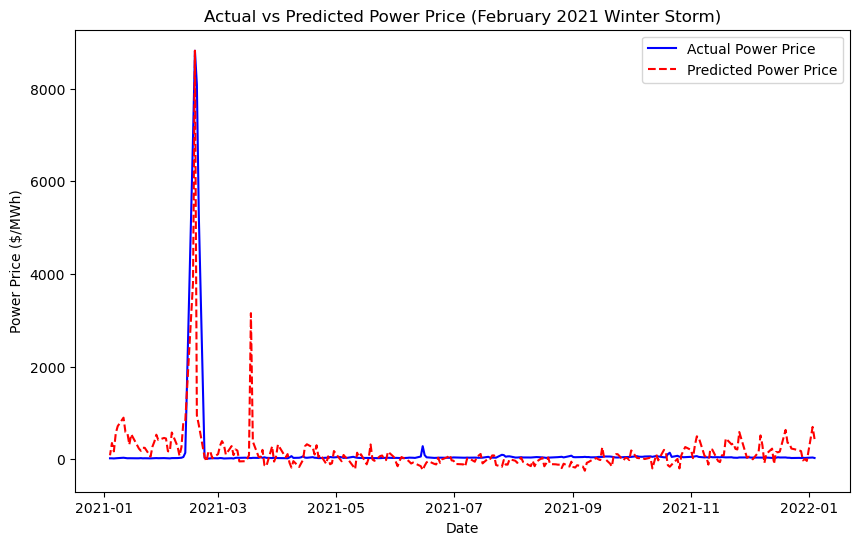

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['LMP_H'], label='Actual Power Price', color='blue')
plt.plot(df2.index, df2['PRED_LMP_H'], label='Predicted Power Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Power Price ($/MWh)')
plt.title('Actual vs Predicted Power Price (February 2021 Winter Storm)')
plt.legend()
plt.show()

In [13]:
# Degree-days
df['CDD'] = np.where(df['TAVG'] > 65, df['TAVG'] - 65, 0)
df['HDD'] = np.where(df['TAVG'] < 65, 65 - df['TAVG'], 0)

In [14]:
# Weather feature engineering
df['WIND_CHILL'] = 35.74 + 0.6215 * df['TAVG'] - 35.75 * (df['AWND'] ** 0.16) + 0.4275 * df['TAVG'] * (df['AWND'] ** 0.16)
df['CUMULATIVE_T'] = df['TAVG'].rolling(window=7).sum()
df['THERMAL_INERTIA'] = df['TAVG'].ewm(span=5).mean()

In [15]:
# Feature engineering involved with heatwave days
heatwave_threshold = df['TMAX'].quantile(0.9)

In [16]:
df['HEATWAVE_DAY'] = df['TMAX'] > heatwave_threshold

In [17]:
df['HEATWAVE_STREAK'] = df['HEATWAVE_DAY'].astype(int).groupby(
    (df['HEATWAVE_DAY'] != df['HEATWAVE_DAY'].shift()).cumsum()
).cumsum()

In [18]:
df['WT_HEAT'] = (df['HEATWAVE_STREAK'] >= 3).astype(int)

In [19]:
df.drop(columns=['HEATWAVE_DAY', 'HEATWAVE_STREAK'], inplace=True)

print(df)

            NG1_PRICE  CO2_PRICE  OIL_PRICE  COAL_PRICE  LMP_H  LMP_N  LMP_S  \
DATE                                                                           
2024-04-08     1.8575    71.1828      86.43     128.200  26.35  24.42  28.31   
2024-04-05     1.7850    67.9644      86.91     129.100   9.06   8.29   9.52   
2024-04-04     1.7740    65.6532      86.59     128.200  17.87  16.67  19.85   
2024-04-03     1.8410    64.4220      85.43     129.650  29.29  26.91  31.87   
2024-04-02     1.8620    65.9016      85.15     132.250  18.86  14.42  18.98   
...               ...        ...        ...         ...    ...    ...    ...   
2021-01-08     2.6660    36.3420      52.24      86.285  24.37  24.62  25.52   
2021-01-07     2.7270    37.4328      50.83      86.285  20.55  20.50  21.19   
2021-01-06     2.7530    37.2924      50.63      86.286  16.51  16.97  15.75   
2021-01-05     2.7470    37.7136      49.93      86.286  19.39  19.28  19.76   
2021-01-04     2.7000    37.5408      47

In [20]:
heatwave_days = df[df['WT_HEAT'] == 1]


print(heatwave_days)

            NG1_PRICE  CO2_PRICE  OIL_PRICE  COAL_PRICE    LMP_H    LMP_N  \
DATE                                                                        
2023-09-06     2.9430    94.9752    86.0100      160.00   172.67   176.91   
2023-09-05     2.9910    95.3964    85.9308      160.50    36.36    37.18   
2023-08-30     3.1810    96.1848    80.6800      156.00   314.91   310.48   
2023-08-29     3.0620    97.1676    79.6700      158.50    75.51    73.04   
2023-08-28     3.1060    96.7896    79.4900      158.50   180.47   173.67   
2023-08-25     3.1350    97.2756    78.6600      149.40  1082.23  1082.76   
2023-08-24     3.0930    99.9540    78.5900      149.00   797.73   794.97   
2023-08-23     3.0440   101.8440    79.3500      150.00   184.82   186.61   
2023-08-17     3.2430   100.1916    78.7300      147.00   663.16   673.57   
2023-08-16     3.2150    98.6796    80.0500      147.50   250.82   249.09   
2023-08-15     2.7810    99.3276    81.3700      147.15   548.96   542.15   

In [21]:
start_date = '2022-06-23'
end_date = '2023-09-06'
df3 = df.loc[start_date:end_date]

In [22]:
df3

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,H_N_POWER_FLOW,H_S_POWER_FLOW,...,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW,CDD,HDD,WIND_CHILL,CUMULATIVE_T,THERMAL_INERTIA,WT_HEAT
DATE,,,,,,,,,,,,,,,,,,,,,
2023-09-06,2.9430,94.9752,86.0100,160.00,172.67,176.91,147.90,180.74,100,97,...,0,0,0,67509.83906,23,0,92.861941,599.0,87.125773,1
2023-09-05,2.9910,95.3964,85.9308,160.50,36.36,37.18,27.87,37.90,102,102,...,0,0,0,67737.34653,24,0,94.328676,609.0,87.750515,1
2023-09-04,2.6402,96.6060,84.7500,156.55,24.68,24.08,23.71,22.22,109,108,...,0,0,0,63700.91234,22,0,91.850351,610.0,87.500344,0
2023-09-01,3.1110,97.2108,82.9600,156.25,85.01,83.93,83.82,95.62,123,126,...,0,0,0,61823.26731,21,0,90.489175,612.0,87.000229,0
2023-08-31,3.1470,97.7724,81.1200,156.00,115.11,112.63,114.82,127.46,122,124,...,0,0,0,61435.60590,21,0,90.498726,617.0,86.666819,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29,5.3920,97.3728,107.0100,385.95,66.77,66.45,66.57,68.36,110,107,...,0,0,0,56469.47490,21,0,90.612478,590.0,83.663356,0
2022-06-28,6.4930,95.4180,108.8900,380.00,74.54,71.23,72.87,73.36,100,103,...,0,0,0,55195.36202,19,0,88.169382,587.0,83.775570,0
2022-06-27,6.5570,94.3920,106.3800,393.50,66.52,64.42,66.19,65.56,96,96,...,0,0,0,54604.55383,22,0,91.643511,588.0,84.850380,0


In [23]:
X = df3[['NG1_PRICE','CUMULATIVE_T','WT_THNDR','WT_HAZE','PRCP','TMAX','TMIN','WT_HEAT','CDD','HDD','LMP_W']]  # Independent variables
y = df3['LMP_H']

In [24]:
X = sm.add_constant(X)

In [25]:
model3 = sm.OLS(y, X).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  LMP_H   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2637.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.48e-290
Time:                        22:43:29   Log-Likelihood:                -1174.4
No. Observations:                 311   AIC:                             2373.
Df Residuals:                     299   BIC:                             2418.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -37.3807     20.002     -1.869   

In [26]:
df3['PRED_LMP_H'] = model3.predict(X)

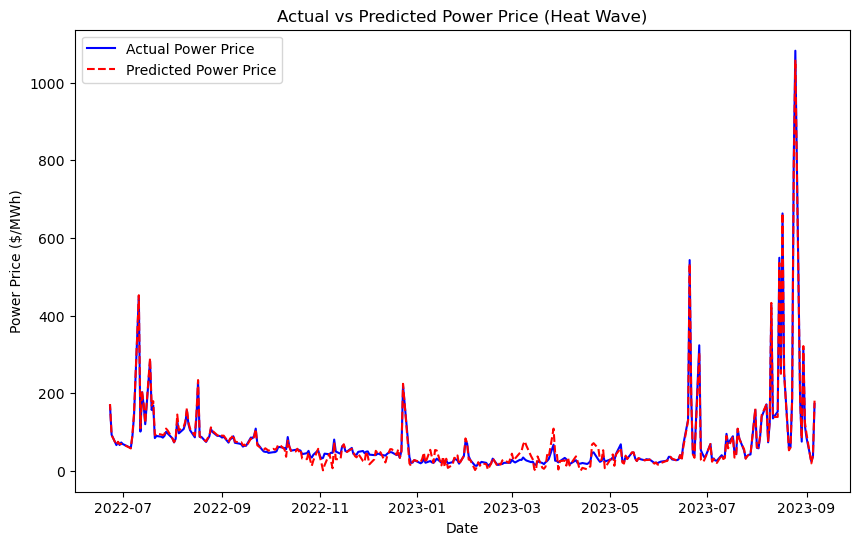

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df3.index, df3['LMP_H'], label='Actual Power Price', color='blue')
plt.plot(df3.index, df3['PRED_LMP_H'], label='Predicted Power Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Power Price ($/MWh)')
plt.title('Actual vs Predicted Power Price (Heat Wave)')
plt.legend()
plt.show()

In [28]:
df['POWER_QUANTITY'] = 100

In [29]:
df['PROFIT_LOSS'] = (df['LMP_H'] - df['LMP_W']) * df['POWER_QUANTITY']

In [30]:
df['PROFIT'] = df['PROFIT_LOSS'].apply(lambda x: x if x > 0 else 0)
df['LOSS'] = df['PROFIT_LOSS'].apply(lambda x: x if x < 0 else 0)

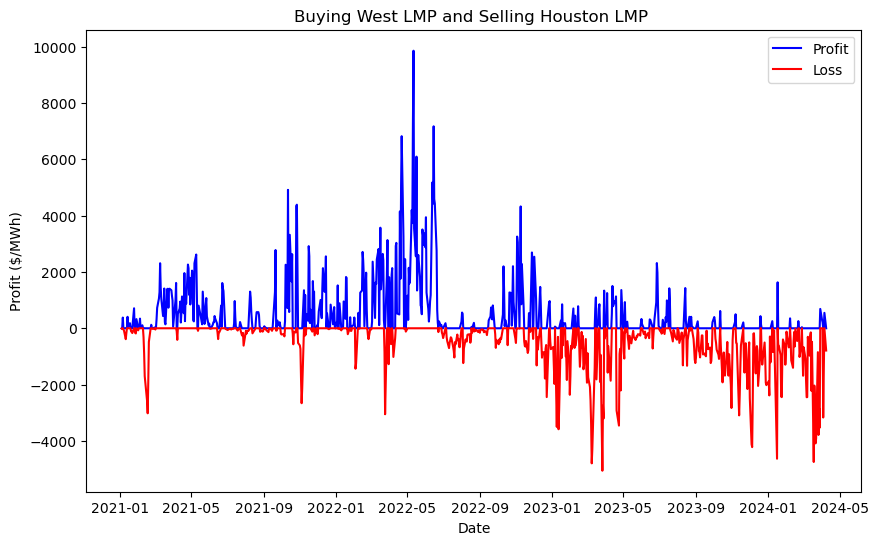

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PROFIT'], label='Profit', color='blue')
plt.plot(df.index, df['LOSS'], label='Loss', color='red')
plt.xlabel('Date')
plt.ylabel('Profit ($/MWh)')
plt.title('Buying West LMP and Selling Houston LMP ')
plt.legend()
plt.show()

In [32]:
df['LMP_H_W'] = df['LMP_H'] - df['LMP_W']
df['LMP_H_N'] = df['LMP_H'] - df['LMP_N'] 
df['LMP_H_S'] = df['LMP_H'] - df['LMP_S']
df['LMP_S_W'] = df['LMP_S'] - df['LMP_W']

In [33]:
df['CRR_H_W'] = df['LMP_H_W'] * df['H_W_POWER_FLOW']
df['CRR_H_N'] = df['LMP_H_N'] * df['H_N_POWER_FLOW']
df['CRR_H_S'] = df['LMP_H_S'] * df['H_S_POWER_FLOW']
df['CRR_S_W'] = df['LMP_S_W'] * df['H_W_POWER_FLOW']

In [34]:
start_date = '2021-01-01'
end_date = '2024-04-01'
df2 = df.loc[start_date:end_date]

/var/folders/q6/2d0nzk6x3q7_zh9s20vttj380000gn/T/ipykernel_12144/1109555895.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2 = df.loc[start_date:end_date]


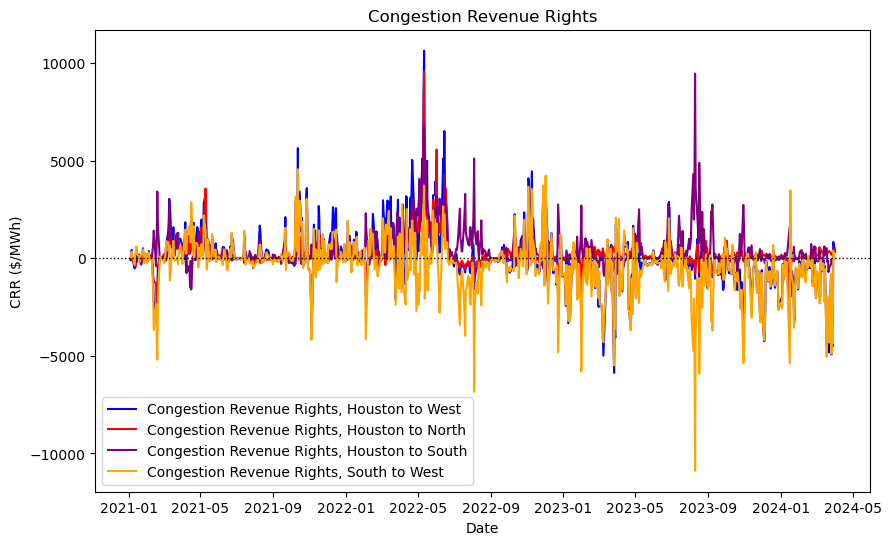

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['CRR_H_W'], label='Congestion Revenue Rights, Houston to West', color='blue')
plt.plot(df2.index, df2['CRR_H_N'], label='Congestion Revenue Rights, Houston to North', color='red')
plt.plot(df2.index, df2['CRR_H_S'], label='Congestion Revenue Rights, Houston to South', color='purple')
plt.plot(df2.index, df2['CRR_S_W'], label='Congestion Revenue Rights, South to West', color='orange')
plt.axhline(0, color='black', linestyle=':', linewidth=1)
plt.xlabel('Date')
plt.ylabel('CRR ($/MWh)')
plt.title('Congestion Revenue Rights')
plt.legend()
plt.show()

In [36]:
start_date = '2024-03-01'
end_date = '2024-04-01'
df3 = df.loc[start_date:end_date]

In [37]:
# Monte Carlo Simulation
historical_lmp = df3['LMP_H']

In [38]:
returns = np.diff(historical_lmp) / historical_lmp[:-1]

In [39]:
mean_return = np.mean(returns)
volatility = np.std(returns)

In [40]:
num_simulations = 1000  # Number of Monte Carlo paths
num_days = 10  # Forecast horizon in days

In [41]:
simulated_paths = []
initial_price = historical_lmp[-1]

In [42]:
for _ in range(num_simulations):
    price_path = [initial_price]
    for _ in range(num_days):
        # Simulate next price based on random return
        next_price = price_path[-1] * (1 + np.random.normal(mean_return, volatility))
        price_path.append(next_price)
    simulated_paths.append(price_path)

In [43]:
simulated_paths = np.array(simulated_paths)

In [44]:
confidence_level = 0.05  # 95% VaR
simulated_end_prices = simulated_paths[:, -1]  # End prices after 10 days for all simulations
VaR = np.percentile(simulated_end_prices, confidence_level * 100) - initial_price

In [45]:
print("10-day Monte Carlo VaR at 95% confidence level:", round(VaR, 2))

10-day Monte Carlo VaR at 95% confidence level: -21.07


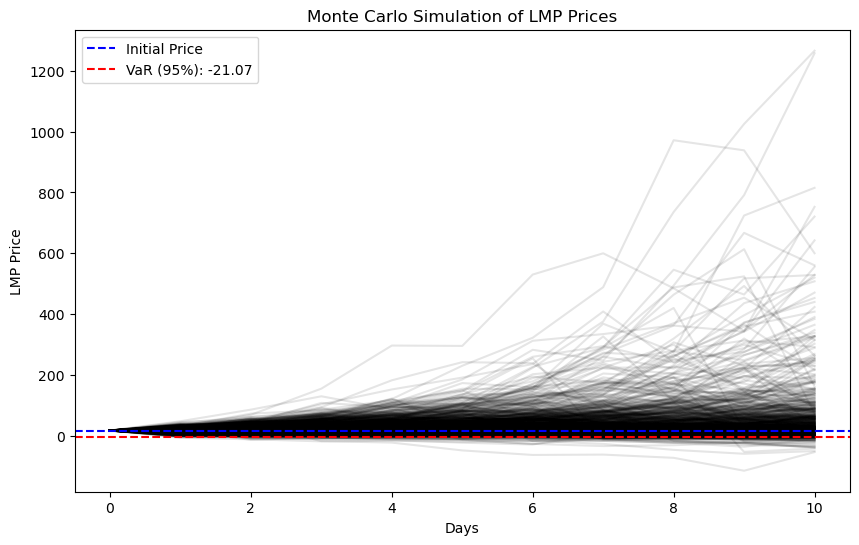

In [46]:
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(range(num_days + 1), simulated_paths[i], color='black', alpha=0.1)

plt.axhline(initial_price, color='blue', linestyle='--', label='Initial Price')
plt.axhline(initial_price + VaR, color='red', linestyle='--', label=f'VaR (95%): {VaR:.2f}')
plt.title('Monte Carlo Simulation of LMP Prices')
plt.xlabel('Days')
plt.ylabel('LMP Price')
plt.legend()
plt.show()

In [80]:
# Second Monte Carlo Simulation for LMP, using South LMP
historical_lmp_s = df3['LMP_S']

In [81]:
returns = np.diff(historical_lmp_s) / historical_lmp_s[:-1]

In [82]:
mean_return = np.mean(returns)
volatility = np.std(returns)

In [83]:
num_simulations = 1000  # Number of Monte Carlo paths
num_days = 10  # Forecast horizon in days

In [84]:
simulated_paths = []
initial_price = historical_lmp_s[-1]

In [85]:
for _ in range(num_simulations):
    price_path = [initial_price]
    for _ in range(num_days):
        # Simulate next price based on random return
        next_price = price_path[-1] * (1 + np.random.normal(mean_return, volatility))
        price_path.append(next_price)
    simulated_paths.append(price_path)

In [86]:
simulated_paths = np.array(simulated_paths)

In [87]:
confidence_level = 0.02  # 95% VaR
simulated_end_prices = simulated_paths[:, -1]  # End prices after 10 days for all simulations
VaR = np.percentile(simulated_end_prices, confidence_level * 100) - initial_price

In [88]:
print("10-day Monte Carlo VaR at 95% confidence level:", round(VaR, 2))

10-day Monte Carlo VaR at 95% confidence level: -341.4


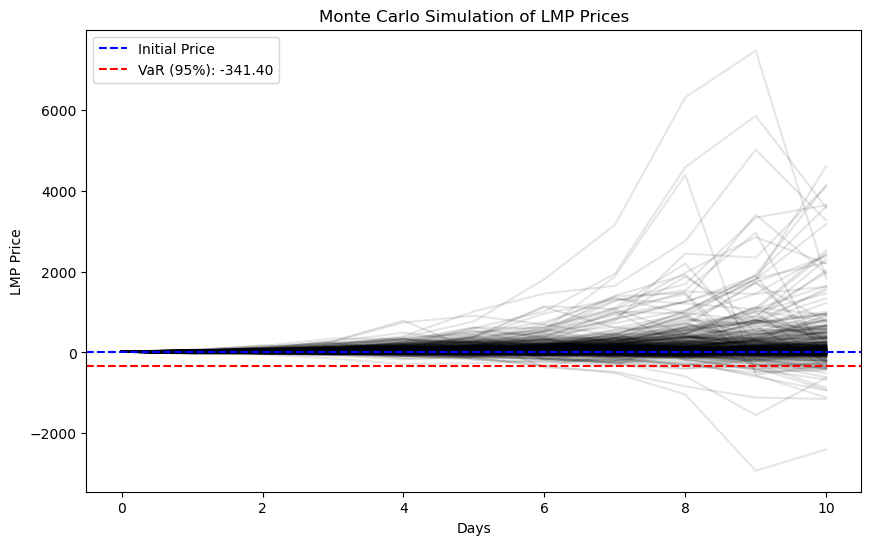

In [89]:
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(range(num_days + 1), simulated_paths[i], color='black', alpha=0.1)

plt.axhline(initial_price, color='blue', linestyle='--', label='Initial Price')
plt.axhline(initial_price + VaR, color='red', linestyle='--', label=f'VaR (95%): {VaR:.2f}')
plt.title('Monte Carlo Simulation of LMP Prices')
plt.xlabel('Days')
plt.ylabel('LMP Price')
plt.legend()
plt.show()